# ANALYZING EDUCATIVE COURSES DATA

## Background  
This analysis project focuses on the educational technology company, Educative, known for its online platform that offers a diverse range of courses to empower individuals seeking to enhance their skills in both professional and academic domains.
Analysis of data from the company will be in-line with <b>Cross Industry Standard for Data Mining (CRISP-DM)


# Planned Steps
* Create a extraction file location 
* Unzip the CSV 
* Merge CSVs into one dataframe and save that in excel as the first sheet
* Do EDA to check vitals (Nulls, Duplicates, Shape, etc)

* <b>Clean Data</b>
    * Drop the URL Column as it wont be in use
    * Remove Duplicated rows based on the courses_id column
    * Remove suffix of "subject: " from the subject columns
    * Create 2 columns 'Free_or_Paid' and 'Revenue'
    * Split the publised_timestamp columns into publised_date(Change data format to dd/mm/yyyy) and published_time
    * Create a time_of_day (Morning/Afternoon/ Evening) column based on the published_time
    * Change columns names and reorder columns
    * Change the column datatype  
    * Do EDA on the new dataframe created
    * Find the top 20 courses per subscribers and add some key columns like Free_or_Paid/Levels/publised_date  
      
 
* <b>Create a final excel sheet with 3 sheets to hold , the original data/cleaned data/ summarydata <b/>   
* Create Pivot Tables and Visualize some Data
* Create a report using PowerBI

In [1]:
import os
import zipfile
import pandas as pd
import glob
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns

In [2]:
#Unzipping the dataset.zip file into the current working directory
zip_path="dataset.zip"
ext_path=os.getcwd()

#creating the extracted folder
if not os.path.exists(ext_path):
    os.makedirs(ext_path)
#Unziping file

with zipfile.ZipFile(zip_path,'r') as zipping:
    zipping.extractall(ext_path)

In [3]:
#Merging Files
all_files=glob.glob("Data Sheet Educative Courses Export\\Data_Sheet*.csv")
print(f'List of all the files \n :{all_files}\n\n')

df_list=[pd.read_csv(file) for file in all_files] #Created a list of dataframes form the all_files list
all_csvs=pd.concat(df_list,ignore_index=True)
all_csvs

List of all the files 
 :['Data Sheet Educative Courses Export\\Data_Sheet_Educative_Courses_-_Business_Courses.csv', 'Data Sheet Educative Courses Export\\Data_Sheet_Educative_Courses_-_Design_Courses.csv', 'Data Sheet Educative Courses Export\\Data_Sheet_Educative_Courses_-_Music_Courses.csv', 'Data Sheet Educative Courses Export\\Data_Sheet_Educative_Courses_-_Web_Development.csv']




,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,49798.0,Bitcoin or How I Learned to Stop Worrying and ...,https://www.educative.com/bitcoin-or-how-i-lea...,0.0,65576.0,936.0,24.0,All Levels,0.56,8.0,2013-04-20T02:25:22Z,Business Finance
1,48841.0,Accounting in 60 Minutes - A Brief Introduction,https://www.educative.com/accounting-in-60-min...,0.0,56659.0,4397.0,16.0,Beginner Level,0.95,1.5,2013-04-07T21:39:25Z,Business Finance
2,133536.0,Stock Market Investing for Beginners,https://www.educative.com/the-beginners-guide-...,0.0,50855.0,2698.0,15.0,All Levels,0.91,1.5,2013-12-25T19:53:34Z,Business Finance
3,151668.0,Introduction to Financial Modeling,https://www.educative.com/financial-modeling-a...,0.0,29167.0,1463.0,8.0,All Levels,0.18,1.5,2014-05-27T16:22:16Z,Business Finance
4,648826.0,The Complete Financial Analyst Course 2017,https://www.educative.com/the-complete-financi...,195.0,24481.0,2347.0,174.0,All Levels,0.37,10.0,2016-01-21T01:38:48Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3676,1227578.0,Learning Path: The Road to Elasticsearch,https://www.educative.com/learning-path-the-ro...,200.0,50.0,5.0,60.0,Beginner Level,0.96,5.0,2017-05-29T17:56:24Z,Subject: Web Development
3677,1277924.0,Angular 4 Front To Back,https://www.educative.com/angular-4-front-to-b...,40.0,44.0,0.0,68.0,All Levels,0.15,8.5,2017-07-06T15:04:55Z,Subject: Web Development
3678,1248172.0,Essentials of Spring 5.0 for Developers,https://www.educative.com/essentials-of-spring...,125.0,34.0,2.0,21.0,Beginner Level,0.46,1.5,2017-06-11T18:34:40Z,Subject: Web Development
3679,1250934.0,Display and analyze GIS data on the web with L...,https://www.educative.com/display-and-analyze-...,100.0,25.0,4.0,66.0,Beginner Level,0.67,12.5,2017-06-15T21:17:43Z,Subject: Web Development


## Basic Exploratory Data Analysis

In [4]:
print(all_csvs.shape)

(3681, 12)


In [5]:
print (all_csvs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3681 entries, 0 to 3680
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3676 non-null   float64
 1   course_title         3676 non-null   object 
 2   url                  3676 non-null   object 
 3   price                3676 non-null   float64
 4   num_subscribers      3676 non-null   float64
 5   num_reviews          3676 non-null   float64
 6   num_lectures         3676 non-null   float64
 7   level                3676 non-null   object 
 8   Rating               3677 non-null   float64
 9   content_duration     3676 non-null   float64
 10  published_timestamp  3676 non-null   object 
 11  subject              3677 non-null   object 
dtypes: float64(7), object(5)
memory usage: 345.2+ KB
None


In [6]:
all_csvs.isnull().sum()
#Checking the number of nulls in the duplicate of the original data
print(f'List of the null columns in original data\n\n{all_csvs.isnull().sum()}\n')
print(f'\nNumber of duplicated records in original data  : {all_csvs.duplicated().sum()}')

List of the null columns in original data

course_id              5
course_title           5
url                    5
price                  5
num_subscribers        5
num_reviews            5
num_lectures           5
level                  5
Rating                 4
content_duration       5
published_timestamp    5
subject                4
dtype: int64


Number of duplicated records in original data  : 2


In [7]:
#Creating duplicated dataset to work on
dup_data=all_csvs.copy()
dup_data

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,49798.0,Bitcoin or How I Learned to Stop Worrying and ...,https://www.educative.com/bitcoin-or-how-i-lea...,0.0,65576.0,936.0,24.0,All Levels,0.56,8.0,2013-04-20T02:25:22Z,Business Finance
1,48841.0,Accounting in 60 Minutes - A Brief Introduction,https://www.educative.com/accounting-in-60-min...,0.0,56659.0,4397.0,16.0,Beginner Level,0.95,1.5,2013-04-07T21:39:25Z,Business Finance
2,133536.0,Stock Market Investing for Beginners,https://www.educative.com/the-beginners-guide-...,0.0,50855.0,2698.0,15.0,All Levels,0.91,1.5,2013-12-25T19:53:34Z,Business Finance
3,151668.0,Introduction to Financial Modeling,https://www.educative.com/financial-modeling-a...,0.0,29167.0,1463.0,8.0,All Levels,0.18,1.5,2014-05-27T16:22:16Z,Business Finance
4,648826.0,The Complete Financial Analyst Course 2017,https://www.educative.com/the-complete-financi...,195.0,24481.0,2347.0,174.0,All Levels,0.37,10.0,2016-01-21T01:38:48Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3676,1227578.0,Learning Path: The Road to Elasticsearch,https://www.educative.com/learning-path-the-ro...,200.0,50.0,5.0,60.0,Beginner Level,0.96,5.0,2017-05-29T17:56:24Z,Subject: Web Development
3677,1277924.0,Angular 4 Front To Back,https://www.educative.com/angular-4-front-to-b...,40.0,44.0,0.0,68.0,All Levels,0.15,8.5,2017-07-06T15:04:55Z,Subject: Web Development
3678,1248172.0,Essentials of Spring 5.0 for Developers,https://www.educative.com/essentials-of-spring...,125.0,34.0,2.0,21.0,Beginner Level,0.46,1.5,2017-06-11T18:34:40Z,Subject: Web Development
3679,1250934.0,Display and analyze GIS data on the web with L...,https://www.educative.com/display-and-analyze-...,100.0,25.0,4.0,66.0,Beginner Level,0.67,12.5,2017-06-15T21:17:43Z,Subject: Web Development


In [8]:
dup_data.shape

(3681, 12)

In [9]:
dup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3681 entries, 0 to 3680
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3676 non-null   float64
 1   course_title         3676 non-null   object 
 2   url                  3676 non-null   object 
 3   price                3676 non-null   float64
 4   num_subscribers      3676 non-null   float64
 5   num_reviews          3676 non-null   float64
 6   num_lectures         3676 non-null   float64
 7   level                3676 non-null   object 
 8   Rating               3677 non-null   float64
 9   content_duration     3676 non-null   float64
 10  published_timestamp  3676 non-null   object 
 11  subject              3677 non-null   object 
dtypes: float64(7), object(5)
memory usage: 345.2+ KB


In [10]:
#Checking the number of nulls in the duplicate of the original data
print(f'List of the null columns before cleaning \n\n{dup_data.isnull().sum()}\n')
print(f'\nNumber of duplicated records before cleaning : {dup_data.duplicated().sum()}')

List of the null columns before cleaning 

course_id              5
course_title           5
url                    5
price                  5
num_subscribers        5
num_reviews            5
num_lectures           5
level                  5
Rating                 4
content_duration       5
published_timestamp    5
subject                4
dtype: int64


Number of duplicated records before cleaning : 2


In [11]:
#Dropping the URL column as it won't be of any use to the analysis
dup_data=dup_data.drop(columns='url')
dup_data.head()

,course_id,course_title,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,49798.0,Bitcoin or How I Learned to Stop Worrying and ...,0.0,65576.0,936.0,24.0,All Levels,0.56,8.0,2013-04-20T02:25:22Z,Business Finance
1,48841.0,Accounting in 60 Minutes - A Brief Introduction,0.0,56659.0,4397.0,16.0,Beginner Level,0.95,1.5,2013-04-07T21:39:25Z,Business Finance
2,133536.0,Stock Market Investing for Beginners,0.0,50855.0,2698.0,15.0,All Levels,0.91,1.5,2013-12-25T19:53:34Z,Business Finance
3,151668.0,Introduction to Financial Modeling,0.0,29167.0,1463.0,8.0,All Levels,0.18,1.5,2014-05-27T16:22:16Z,Business Finance
4,648826.0,The Complete Financial Analyst Course 2017,195.0,24481.0,2347.0,174.0,All Levels,0.37,10.0,2016-01-21T01:38:48Z,Business Finance


In [12]:
#Dropping rows if they have no data in the course_id column and resetting indexes after
dup_data=dup_data.dropna(subset='course_id')
dup_data=dup_data.reset_index(drop=True)
dup_data

,course_id,course_title,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,49798.0,Bitcoin or How I Learned to Stop Worrying and ...,0.0,65576.0,936.0,24.0,All Levels,0.56,8.0,2013-04-20T02:25:22Z,Business Finance
1,48841.0,Accounting in 60 Minutes - A Brief Introduction,0.0,56659.0,4397.0,16.0,Beginner Level,0.95,1.5,2013-04-07T21:39:25Z,Business Finance
2,133536.0,Stock Market Investing for Beginners,0.0,50855.0,2698.0,15.0,All Levels,0.91,1.5,2013-12-25T19:53:34Z,Business Finance
3,151668.0,Introduction to Financial Modeling,0.0,29167.0,1463.0,8.0,All Levels,0.18,1.5,2014-05-27T16:22:16Z,Business Finance
4,648826.0,The Complete Financial Analyst Course 2017,195.0,24481.0,2347.0,174.0,All Levels,0.37,10.0,2016-01-21T01:38:48Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...
3671,1227578.0,Learning Path: The Road to Elasticsearch,200.0,50.0,5.0,60.0,Beginner Level,0.96,5.0,2017-05-29T17:56:24Z,Subject: Web Development
3672,1277924.0,Angular 4 Front To Back,40.0,44.0,0.0,68.0,All Levels,0.15,8.5,2017-07-06T15:04:55Z,Subject: Web Development
3673,1248172.0,Essentials of Spring 5.0 for Developers,125.0,34.0,2.0,21.0,Beginner Level,0.46,1.5,2017-06-11T18:34:40Z,Subject: Web Development
3674,1250934.0,Display and analyze GIS data on the web with L...,100.0,25.0,4.0,66.0,Beginner Level,0.67,12.5,2017-06-15T21:17:43Z,Subject: Web Development


In [13]:
#Checking the new shape after a little cleaning
dup_data.shape

(3676, 11)

In [14]:
#Checking the number of nulls in the duplicate of the original data
print(f'List of the null columns after cleaning \n\n{dup_data.isnull().sum()}')
print(f'\nNumber of duplicated records after cleaning : {dup_data.duplicated().sum()}')

List of the null columns after cleaning 

course_id              0
course_title           0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
Rating                 0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

Number of duplicated records after cleaning : 0


In [15]:
#Descriptive Statistics on the numerical column
dup_data.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,Rating,content_duration
count,3.676000e+03,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000,3676.000000
mean,6.757535e+05,66.115343,3199.260881,156.309848,40.129761,0.610868,4.096137
std,3.431304e+05,61.056073,9486.582966,935.674518,50.398507,0.334287,6.054948
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.074740e+05,20.000000,112.000000,4.000000,15.000000,0.280000,1.000000
50%,6.876920e+05,45.000000,912.500000,18.000000,25.000000,0.760000,2.000000
75%,9.608140e+05,95.000000,2558.000000,67.000000,46.000000,0.930000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,1.000000,78.500000


In [16]:
#Descriptive Statistics on the numerical column
dup_data.describe(include='object')

,course_title,level,published_timestamp,subject
count,3676,3676,3676,3676
unique,3663,4,3672,4
top,Acoustic Blues Guitar Lessons,All Levels,2017-02-07T17:20:39Z,Subject: Web Development
freq,3,1925,2,1203


In [17]:
#Creating of the Revenue column and free_or_paid
dup_data['revenue']=dup_data['price']*dup_data['num_subscribers']
dup_data['Free_or_Paid']=dup_data['price'].apply(lambda x: 'Free' if x ==0 else 'Paid')
dup_data

,course_id,course_title,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject,revenue,Free_or_Paid
0,49798.0,Bitcoin or How I Learned to Stop Worrying and ...,0.0,65576.0,936.0,24.0,All Levels,0.56,8.0,2013-04-20T02:25:22Z,Business Finance,0.0,Free
1,48841.0,Accounting in 60 Minutes - A Brief Introduction,0.0,56659.0,4397.0,16.0,Beginner Level,0.95,1.5,2013-04-07T21:39:25Z,Business Finance,0.0,Free
2,133536.0,Stock Market Investing for Beginners,0.0,50855.0,2698.0,15.0,All Levels,0.91,1.5,2013-12-25T19:53:34Z,Business Finance,0.0,Free
3,151668.0,Introduction to Financial Modeling,0.0,29167.0,1463.0,8.0,All Levels,0.18,1.5,2014-05-27T16:22:16Z,Business Finance,0.0,Free
4,648826.0,The Complete Financial Analyst Course 2017,195.0,24481.0,2347.0,174.0,All Levels,0.37,10.0,2016-01-21T01:38:48Z,Business Finance,4773795.0,Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3671,1227578.0,Learning Path: The Road to Elasticsearch,200.0,50.0,5.0,60.0,Beginner Level,0.96,5.0,2017-05-29T17:56:24Z,Subject: Web Development,10000.0,Paid
3672,1277924.0,Angular 4 Front To Back,40.0,44.0,0.0,68.0,All Levels,0.15,8.5,2017-07-06T15:04:55Z,Subject: Web Development,1760.0,Paid
3673,1248172.0,Essentials of Spring 5.0 for Developers,125.0,34.0,2.0,21.0,Beginner Level,0.46,1.5,2017-06-11T18:34:40Z,Subject: Web Development,4250.0,Paid
3674,1250934.0,Display and analyze GIS data on the web with L...,100.0,25.0,4.0,66.0,Beginner Level,0.67,12.5,2017-06-15T21:17:43Z,Subject: Web Development,2500.0,Paid


In [18]:
#Cleaning the Subject column by taking off the 'Subject : 'prefix for some records
dup_data['subject']=dup_data['subject'].str.lstrip('Subject:')
dup_data

,course_id,course_title,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject,revenue,Free_or_Paid
0,49798.0,Bitcoin or How I Learned to Stop Worrying and ...,0.0,65576.0,936.0,24.0,All Levels,0.56,8.0,2013-04-20T02:25:22Z,Business Finance,0.0,Free
1,48841.0,Accounting in 60 Minutes - A Brief Introduction,0.0,56659.0,4397.0,16.0,Beginner Level,0.95,1.5,2013-04-07T21:39:25Z,Business Finance,0.0,Free
2,133536.0,Stock Market Investing for Beginners,0.0,50855.0,2698.0,15.0,All Levels,0.91,1.5,2013-12-25T19:53:34Z,Business Finance,0.0,Free
3,151668.0,Introduction to Financial Modeling,0.0,29167.0,1463.0,8.0,All Levels,0.18,1.5,2014-05-27T16:22:16Z,Business Finance,0.0,Free
4,648826.0,The Complete Financial Analyst Course 2017,195.0,24481.0,2347.0,174.0,All Levels,0.37,10.0,2016-01-21T01:38:48Z,Business Finance,4773795.0,Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3671,1227578.0,Learning Path: The Road to Elasticsearch,200.0,50.0,5.0,60.0,Beginner Level,0.96,5.0,2017-05-29T17:56:24Z,Web Development,10000.0,Paid
3672,1277924.0,Angular 4 Front To Back,40.0,44.0,0.0,68.0,All Levels,0.15,8.5,2017-07-06T15:04:55Z,Web Development,1760.0,Paid
3673,1248172.0,Essentials of Spring 5.0 for Developers,125.0,34.0,2.0,21.0,Beginner Level,0.46,1.5,2017-06-11T18:34:40Z,Web Development,4250.0,Paid
3674,1250934.0,Display and analyze GIS data on the web with L...,100.0,25.0,4.0,66.0,Beginner Level,0.67,12.5,2017-06-15T21:17:43Z,Web Development,2500.0,Paid


In [19]:
#Splitting the published_timestamp to published_date and published_time
dup_data[['published_date','published_time']]=dup_data['published_timestamp'].str.split('T',expand=True) #T is the delimiter
dup_data['published_time']=dup_data['published_time'].str.rstrip('Z') 
dup_data=dup_data.drop(columns='published_timestamp')
dup_data.head()

,course_id,course_title,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,subject,revenue,Free_or_Paid,published_date,published_time
0,49798.0,Bitcoin or How I Learned to Stop Worrying and ...,0.0,65576.0,936.0,24.0,All Levels,0.56,8.0,Business Finance,0.0,Free,2013-04-20,02:25:22
1,48841.0,Accounting in 60 Minutes - A Brief Introduction,0.0,56659.0,4397.0,16.0,Beginner Level,0.95,1.5,Business Finance,0.0,Free,2013-04-07,21:39:25
2,133536.0,Stock Market Investing for Beginners,0.0,50855.0,2698.0,15.0,All Levels,0.91,1.5,Business Finance,0.0,Free,2013-12-25,19:53:34
3,151668.0,Introduction to Financial Modeling,0.0,29167.0,1463.0,8.0,All Levels,0.18,1.5,Business Finance,0.0,Free,2014-05-27,16:22:16
4,648826.0,The Complete Financial Analyst Course 2017,195.0,24481.0,2347.0,174.0,All Levels,0.37,10.0,Business Finance,4773795.0,Paid,2016-01-21,01:38:48


In [20]:
#Converting from yyyy/mm/dd to dd/mm/yyyy in the published_date column
dup_data['published_date']=pd.to_datetime(dup_data['published_date']).dt.strftime('%d/%m/%Y')
dup_data

,course_id,course_title,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,subject,revenue,Free_or_Paid,published_date,published_time
0,49798.0,Bitcoin or How I Learned to Stop Worrying and ...,0.0,65576.0,936.0,24.0,All Levels,0.56,8.0,Business Finance,0.0,Free,20/04/2013,02:25:22
1,48841.0,Accounting in 60 Minutes - A Brief Introduction,0.0,56659.0,4397.0,16.0,Beginner Level,0.95,1.5,Business Finance,0.0,Free,07/04/2013,21:39:25
2,133536.0,Stock Market Investing for Beginners,0.0,50855.0,2698.0,15.0,All Levels,0.91,1.5,Business Finance,0.0,Free,25/12/2013,19:53:34
3,151668.0,Introduction to Financial Modeling,0.0,29167.0,1463.0,8.0,All Levels,0.18,1.5,Business Finance,0.0,Free,27/05/2014,16:22:16
4,648826.0,The Complete Financial Analyst Course 2017,195.0,24481.0,2347.0,174.0,All Levels,0.37,10.0,Business Finance,4773795.0,Paid,21/01/2016,01:38:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3671,1227578.0,Learning Path: The Road to Elasticsearch,200.0,50.0,5.0,60.0,Beginner Level,0.96,5.0,Web Development,10000.0,Paid,29/05/2017,17:56:24
3672,1277924.0,Angular 4 Front To Back,40.0,44.0,0.0,68.0,All Levels,0.15,8.5,Web Development,1760.0,Paid,06/07/2017,15:04:55
3673,1248172.0,Essentials of Spring 5.0 for Developers,125.0,34.0,2.0,21.0,Beginner Level,0.46,1.5,Web Development,4250.0,Paid,11/06/2017,18:34:40
3674,1250934.0,Display and analyze GIS data on the web with L...,100.0,25.0,4.0,66.0,Beginner Level,0.67,12.5,Web Development,2500.0,Paid,15/06/2017,21:17:43


In [21]:
#Converting the published_time to a time datatype to assit you create the time_of_day
#Categorizing the published time into time of the day Morning (times which are less than 12pm), Afternoon(less than 6pm),Evening
#12:00:00 == 43200secs // 18:00:00 == 64800secs (Morning <12pm, Afternoon <6pm)
dup_data['times_in_seconds']=pd.to_timedelta(dup_data['published_time']).dt.total_seconds().astype(int)
dup_data['time_of_day']=dup_data['times_in_seconds'].apply(lambda x:'Morning' if x< 43200 else('Afternoon' if x < 64800 else 'Evening'))
dup_data=dup_data.drop(columns='times_in_seconds')
dup_data

,course_id,course_title,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,subject,revenue,Free_or_Paid,published_date,published_time,time_of_day
0,49798.0,Bitcoin or How I Learned to Stop Worrying and ...,0.0,65576.0,936.0,24.0,All Levels,0.56,8.0,Business Finance,0.0,Free,20/04/2013,02:25:22,Morning
1,48841.0,Accounting in 60 Minutes - A Brief Introduction,0.0,56659.0,4397.0,16.0,Beginner Level,0.95,1.5,Business Finance,0.0,Free,07/04/2013,21:39:25,Evening
2,133536.0,Stock Market Investing for Beginners,0.0,50855.0,2698.0,15.0,All Levels,0.91,1.5,Business Finance,0.0,Free,25/12/2013,19:53:34,Evening
3,151668.0,Introduction to Financial Modeling,0.0,29167.0,1463.0,8.0,All Levels,0.18,1.5,Business Finance,0.0,Free,27/05/2014,16:22:16,Afternoon
4,648826.0,The Complete Financial Analyst Course 2017,195.0,24481.0,2347.0,174.0,All Levels,0.37,10.0,Business Finance,4773795.0,Paid,21/01/2016,01:38:48,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3671,1227578.0,Learning Path: The Road to Elasticsearch,200.0,50.0,5.0,60.0,Beginner Level,0.96,5.0,Web Development,10000.0,Paid,29/05/2017,17:56:24,Afternoon
3672,1277924.0,Angular 4 Front To Back,40.0,44.0,0.0,68.0,All Levels,0.15,8.5,Web Development,1760.0,Paid,06/07/2017,15:04:55,Afternoon
3673,1248172.0,Essentials of Spring 5.0 for Developers,125.0,34.0,2.0,21.0,Beginner Level,0.46,1.5,Web Development,4250.0,Paid,11/06/2017,18:34:40,Evening
3674,1250934.0,Display and analyze GIS data on the web with L...,100.0,25.0,4.0,66.0,Beginner Level,0.67,12.5,Web Development,2500.0,Paid,15/06/2017,21:17:43,Evening


In [22]:
dup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3676 entries, 0 to 3675
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         3676 non-null   float64
 1   course_title      3676 non-null   object 
 2   price             3676 non-null   float64
 3   num_subscribers   3676 non-null   float64
 4   num_reviews       3676 non-null   float64
 5   num_lectures      3676 non-null   float64
 6   level             3676 non-null   object 
 7   Rating            3676 non-null   float64
 8   content_duration  3676 non-null   float64
 9   subject           3676 non-null   object 
 10  revenue           3676 non-null   float64
 11  Free_or_Paid      3676 non-null   object 
 12  published_date    3676 non-null   object 
 13  published_time    3676 non-null   object 
 14  time_of_day       3676 non-null   object 
dtypes: float64(8), object(7)
memory usage: 430.9+ KB


In [23]:
print(f'original columns : {all_csvs.columns}')
print(f'duplicated data columns : {dup_data.columns}')

original columns : Index(['course_id', 'course_title', 'url', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'Rating', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')
duplicated data columns : Index(['course_id', 'course_title', 'price', 'num_subscribers', 'num_reviews',
       'num_lectures', 'level', 'Rating', 'content_duration', 'subject',
       'revenue', 'Free_or_Paid', 'published_date', 'published_time',
       'time_of_day'],
      dtype='object')


In [24]:
#Changing Column Names
new_names=['Course_ID', 'Course_Title', 'Price', 'Number_of_Subscribers', 'Number_of_Reviews','Number_of_Lectures', 
           'Level', 'Rating', 'Content_Duration', 'Subject','Revenue', 'Free_or_Paid', 'Published_Date', 'Published_Time',
       'Time_of_Day']
dup_data.columns=new_names
dup_data

,Course_ID,Course_Title,Price,Number_of_Subscribers,Number_of_Reviews,Number_of_Lectures,Level,Rating,Content_Duration,Subject,Revenue,Free_or_Paid,Published_Date,Published_Time,Time_of_Day
0,49798.0,Bitcoin or How I Learned to Stop Worrying and ...,0.0,65576.0,936.0,24.0,All Levels,0.56,8.0,Business Finance,0.0,Free,20/04/2013,02:25:22,Morning
1,48841.0,Accounting in 60 Minutes - A Brief Introduction,0.0,56659.0,4397.0,16.0,Beginner Level,0.95,1.5,Business Finance,0.0,Free,07/04/2013,21:39:25,Evening
2,133536.0,Stock Market Investing for Beginners,0.0,50855.0,2698.0,15.0,All Levels,0.91,1.5,Business Finance,0.0,Free,25/12/2013,19:53:34,Evening
3,151668.0,Introduction to Financial Modeling,0.0,29167.0,1463.0,8.0,All Levels,0.18,1.5,Business Finance,0.0,Free,27/05/2014,16:22:16,Afternoon
4,648826.0,The Complete Financial Analyst Course 2017,195.0,24481.0,2347.0,174.0,All Levels,0.37,10.0,Business Finance,4773795.0,Paid,21/01/2016,01:38:48,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3671,1227578.0,Learning Path: The Road to Elasticsearch,200.0,50.0,5.0,60.0,Beginner Level,0.96,5.0,Web Development,10000.0,Paid,29/05/2017,17:56:24,Afternoon
3672,1277924.0,Angular 4 Front To Back,40.0,44.0,0.0,68.0,All Levels,0.15,8.5,Web Development,1760.0,Paid,06/07/2017,15:04:55,Afternoon
3673,1248172.0,Essentials of Spring 5.0 for Developers,125.0,34.0,2.0,21.0,Beginner Level,0.46,1.5,Web Development,4250.0,Paid,11/06/2017,18:34:40,Evening
3674,1250934.0,Display and analyze GIS data on the web with L...,100.0,25.0,4.0,66.0,Beginner Level,0.67,12.5,Web Development,2500.0,Paid,15/06/2017,21:17:43,Evening


In [25]:
#Reordering the columns
reorder_cols=['Course_ID', 'Course_Title', 'Free_or_Paid','Price', 'Number_of_Subscribers', 'Revenue','Number_of_Reviews',
              'Number_of_Lectures', 'Level', 'Rating', 'Content_Duration', 'Subject',  'Published_Date', 'Published_Time',
              'Time_of_Day']
dup_data=dup_data.reindex(columns=reorder_cols)
dup_data.head()

,Course_ID,Course_Title,Free_or_Paid,Price,Number_of_Subscribers,Revenue,Number_of_Reviews,Number_of_Lectures,Level,Rating,Content_Duration,Subject,Published_Date,Published_Time,Time_of_Day
0,49798.0,Bitcoin or How I Learned to Stop Worrying and ...,Free,0.0,65576.0,0.0,936.0,24.0,All Levels,0.56,8.0,Business Finance,20/04/2013,02:25:22,Morning
1,48841.0,Accounting in 60 Minutes - A Brief Introduction,Free,0.0,56659.0,0.0,4397.0,16.0,Beginner Level,0.95,1.5,Business Finance,07/04/2013,21:39:25,Evening
2,133536.0,Stock Market Investing for Beginners,Free,0.0,50855.0,0.0,2698.0,15.0,All Levels,0.91,1.5,Business Finance,25/12/2013,19:53:34,Evening
3,151668.0,Introduction to Financial Modeling,Free,0.0,29167.0,0.0,1463.0,8.0,All Levels,0.18,1.5,Business Finance,27/05/2014,16:22:16,Afternoon
4,648826.0,The Complete Financial Analyst Course 2017,Paid,195.0,24481.0,4773795.0,2347.0,174.0,All Levels,0.37,10.0,Business Finance,21/01/2016,01:38:48,Morning


In [26]:
#Changing the datatypes
dup_data['Course_ID']=dup_data['Course_ID'].astype('object')
dup_data['Free_or_Paid']=dup_data['Free_or_Paid'].astype('category')
dup_data['Subject']=dup_data['Subject'].astype('category')
dup_data['Level']=dup_data['Level'].astype('category')
dup_data['Number_of_Subscribers']=dup_data['Number_of_Subscribers'].astype('int')
dup_data['Number_of_Reviews']=dup_data['Number_of_Reviews'].astype('int')
dup_data['Number_of_Lectures']=dup_data['Number_of_Lectures'].astype('int')
dup_data['Number_of_Subscribers']=dup_data['Number_of_Subscribers'].astype('int')
dup_data['Time_of_Day']=dup_data['Time_of_Day'].astype('category')

In [27]:
dup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3676 entries, 0 to 3675
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Course_ID              3676 non-null   object  
 1   Course_Title           3676 non-null   object  
 2   Free_or_Paid           3676 non-null   category
 3   Price                  3676 non-null   float64 
 4   Number_of_Subscribers  3676 non-null   int32   
 5   Revenue                3676 non-null   float64 
 6   Number_of_Reviews      3676 non-null   int32   
 7   Number_of_Lectures     3676 non-null   int32   
 8   Level                  3676 non-null   category
 9   Rating                 3676 non-null   float64 
 10  Content_Duration       3676 non-null   float64 
 11  Subject                3676 non-null   category
 12  Published_Date         3676 non-null   object  
 13  Published_Time         3676 non-null   object  
 14  Time_of_Day            3676 non-null   c

In [28]:
dup_data.head()

,Course_ID,Course_Title,Free_or_Paid,Price,Number_of_Subscribers,Revenue,Number_of_Reviews,Number_of_Lectures,Level,Rating,Content_Duration,Subject,Published_Date,Published_Time,Time_of_Day
0,49798.0,Bitcoin or How I Learned to Stop Worrying and ...,Free,0.0,65576,0.0,936,24,All Levels,0.56,8.0,Business Finance,20/04/2013,02:25:22,Morning
1,48841.0,Accounting in 60 Minutes - A Brief Introduction,Free,0.0,56659,0.0,4397,16,Beginner Level,0.95,1.5,Business Finance,07/04/2013,21:39:25,Evening
2,133536.0,Stock Market Investing for Beginners,Free,0.0,50855,0.0,2698,15,All Levels,0.91,1.5,Business Finance,25/12/2013,19:53:34,Evening
3,151668.0,Introduction to Financial Modeling,Free,0.0,29167,0.0,1463,8,All Levels,0.18,1.5,Business Finance,27/05/2014,16:22:16,Afternoon
4,648826.0,The Complete Financial Analyst Course 2017,Paid,195.0,24481,4773795.0,2347,174,All Levels,0.37,10.0,Business Finance,21/01/2016,01:38:48,Morning


In [29]:
dup_data.corr(numeric_only=True)

,Price,Number_of_Subscribers,Revenue,Number_of_Reviews,Number_of_Lectures,Rating,Content_Duration
Price,1.000000,0.050555,0.347614,0.113423,0.330233,0.031643,0.293245
Number_of_Subscribers,0.050555,1.000000,0.555737,0.650761,0.158092,-0.007353,0.161844
Revenue,0.347614,0.555737,1.000000,0.770030,0.322481,-0.011473,0.296945
Number_of_Reviews,0.113423,0.650761,0.770030,1.000000,0.242986,0.004137,0.228842
Number_of_Lectures,0.330233,0.158092,0.322481,0.242986,1.000000,-0.037170,0.801630
Rating,0.031643,-0.007353,-0.011473,0.004137,-0.037170,1.000000,0.000650
Content_Duration,0.293245,0.161844,0.296945,0.228842,0.801630,0.000650,1.000000


In [30]:
cleaned_data=dup_data.copy()

In [31]:
#Summary data of the top 20 subjects based on the subscribers
target_cols=['Course_Title','Number_of_Subscribers','Level','Free_or_Paid','Content_Duration','Published_Date']
top_20_courses=dup_data[target_cols].sort_values(by='Number_of_Subscribers',ascending=False).copy()
top_20_courses=top_20_courses.sort_values(by='Number_of_Subscribers',ascending=False).head(20)
top_20_courses=top_20_courses.reset_index(drop=True)
top_20_courses

,Course_Title,Number_of_Subscribers,Level,Free_or_Paid,Content_Duration,Published_Date
0,Learn HTML5 Programming From Scratch,268923,Beginner Level,Free,10.5,14/02/2013
1,Coding for Entrepreneurs Basic,161029,Expert Level,Free,3.5,09/06/2013
2,The Web Developer Bootcamp,121584,Beginner Level,Paid,43.0,02/11/2015
3,Build Your First Website in 1 Week with HTML5 ...,120291,All Levels,Free,3.0,08/04/2014
4,The Complete Web Developer Course 2.0,114512,Beginner Level,Paid,30.5,08/03/2016
5,Free Beginner Electric Guitar Lessons,101154,All Levels,Free,4.5,15/06/2012
6,Web Design for Web Developers: Build Beautiful...,98867,All Levels,Free,3.0,13/04/2015
7,Learn Javascript & JQuery From Scratch,84897,All Levels,Paid,2.0,10/10/2013
8,Practical PHP: Master the Basics and Code Dyna...,83737,Intermediate Level,Free,6.5,19/07/2014
9,JavaScript: Understanding the Weird Parts,79612,All Levels,Paid,11.5,12/03/2015


In [32]:
#Saving the 3 data into one excel
with pd.ExcelWriter('Educative Data.xlsx') as master:
    all_csvs.to_excel(master, sheet_name='Main_Data', index=False)
    cleaned_data.to_excel(master, sheet_name='Cleaned_Data', index=False)
    top_20_courses.to_excel(master, sheet_name='Top_20_Subs_Courses', index=False)

# Data Visualization

* <b>Visualizations</b>
    * Create the pivot table for the following and visualize  
        ●Total number of subscribers for each subject   
        ●Average subscriber count per subject  
        ●Average cost per subject at each level  
        ●Average content duration per subject  
        ●Average rating per subject for each level  
        ●Revenue Generated per each subject over the years
  
* Save visuals in a PDF format after.                

In [33]:
#Creating a duplicate of the cleaned data for my pivot table
pivot_data=cleaned_data.copy()
pivot_data['Published_Date'] = pd.to_datetime(pivot_data['Published_Date'], format='%d/%m/%Y')

# Create a new column for just the year
pivot_data['Published_Year'] = pivot_data['Published_Date'].dt.year
pivot_data.head()


,Course_ID,Course_Title,Free_or_Paid,Price,Number_of_Subscribers,Revenue,Number_of_Reviews,Number_of_Lectures,Level,Rating,Content_Duration,Subject,Published_Date,Published_Time,Time_of_Day,Published_Year
0,49798.0,Bitcoin or How I Learned to Stop Worrying and ...,Free,0.0,65576,0.0,936,24,All Levels,0.56,8.0,Business Finance,2013-04-20,02:25:22,Morning,2013
1,48841.0,Accounting in 60 Minutes - A Brief Introduction,Free,0.0,56659,0.0,4397,16,Beginner Level,0.95,1.5,Business Finance,2013-04-07,21:39:25,Evening,2013
2,133536.0,Stock Market Investing for Beginners,Free,0.0,50855,0.0,2698,15,All Levels,0.91,1.5,Business Finance,2013-12-25,19:53:34,Evening,2013
3,151668.0,Introduction to Financial Modeling,Free,0.0,29167,0.0,1463,8,All Levels,0.18,1.5,Business Finance,2014-05-27,16:22:16,Afternoon,2014
4,648826.0,The Complete Financial Analyst Course 2017,Paid,195.0,24481,4773795.0,2347,174,All Levels,0.37,10.0,Business Finance,2016-01-21,01:38:48,Morning,2016


In [34]:
#Pivot Table for the Total Number of Subscribers Per Subject
subject_subs=pd.pivot_table(data=pivot_data,index='Subject',values='Number_of_Subscribers',aggfunc='sum')
subject_subs

,Number_of_Subscribers
Subject,
Web Development,7981935
Business Finance,1868711
Graphic Design,1063148
Musical Instruments,846689


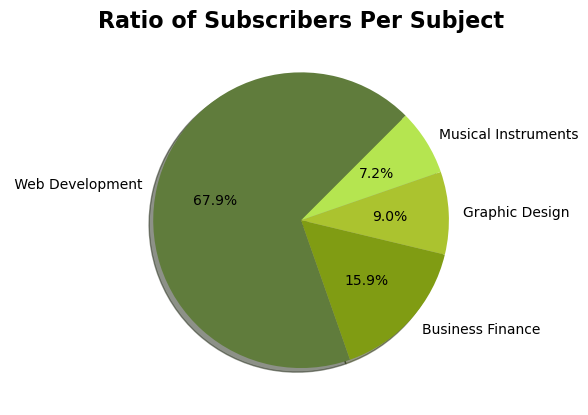

In [35]:
custom_palette = sns.color_palette(["#607C3C",  "#809C13", "#ABC32F", "#B5E550"])

plt.pie(subject_subs["Number_of_Subscribers"],
        autopct = '%.1f%%',labels=subject_subs.index,
        shadow=True, colors=custom_palette,
       startangle=45);
plt.title('Ratio of Subscribers Per Subject',
          fontsize=16, fontweight='bold')
plt.savefig('subs_per_subject_ratio_pie_chart.png')
plt.show()

In [36]:
#Average subscriber count per subject
avg_sub_subject=round((pd.pivot_table(data=pivot_data, index='Subject',values='Number_of_Subscribers',aggfunc='mean')),2)
avg_sub_subject=avg_sub_subject.sort_values(by='Number_of_Subscribers',ascending=False)
avg_sub_subject

,Number_of_Subscribers
Subject,
Web Development,6635.02
Graphic Design,1766.03
Business Finance,1569.03
Musical Instruments,1245.13


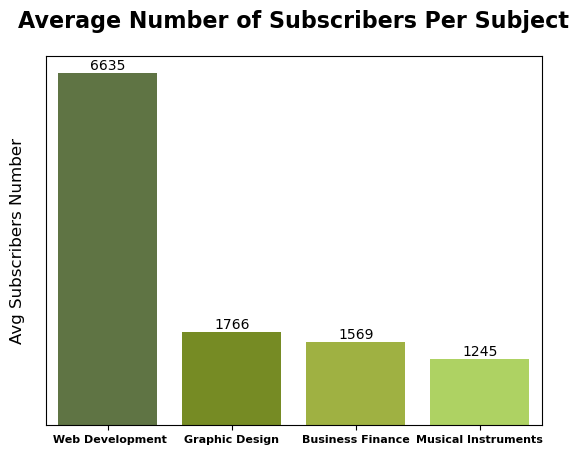

In [37]:

custom_palette = sns.color_palette(["#607C3C",  "#809C13", "#ABC32F", "#B5E550"])
ax=sns.barplot(data=avg_sub_subject,x=avg_sub_subject.index,y=avg_sub_subject['Number_of_Subscribers'],
            palette=custom_palette,order=avg_sub_subject.index)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xticks(fontsize=8,fontweight='bold')  
plt.yticks([])
plt.xlabel(None)  # X-axis label
plt.ylabel('Avg Subscribers Number', fontsize=12,labelpad=15)  # Y-axis label
plt.title('Average Number of Subscribers Per Subject', fontsize=16, fontweight='bold',pad=20) 
plt.savefig('avg_subs_num_per_subject_column_chart.png')
plt.show()

In [38]:
#Average content duration per subject
avg_dur_subj=round((pd.pivot_table(data=pivot_data, index='Subject',values='Content_Duration',aggfunc='mean')),1)
avg_dur_subj

,Content_Duration
Subject,
Web Development,5.6
Business Finance,3.6
Graphic Design,3.6
Musical Instruments,2.9


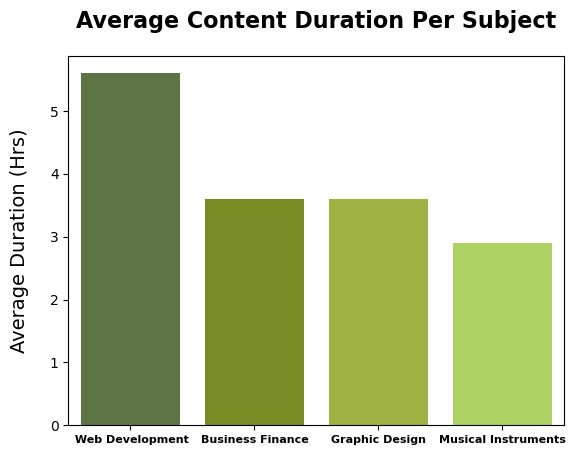

In [39]:

custom_palette = sns.color_palette(["#607C3C",  "#809C13", "#ABC32F", "#B5E550"])
ax=sns.barplot(data=avg_dur_subj,x=avg_dur_subj.index,y=avg_dur_subj['Content_Duration'],
            palette=custom_palette,order=avg_dur_subj.index)


    
plt.xticks(fontsize=8, fontweight='bold') 
plt.xlabel(None)  # X-axis label
plt.ylabel('Average Duration (Hrs)', fontsize=14,labelpad=15)  # Y-axis label
plt.title('Average Content Duration Per Subject', fontsize=16, fontweight='bold',pad=20) 
plt.savefig('avg_duration_per_subject_column_chart.png')
plt.show()

In [40]:
# Average cost per subject at each level
avg_price_subjlvl=round((pd.pivot_table(data=pivot_data, index='Subject', columns='Level',values='Price',aggfunc='mean')),2)
avg_price_subjlvl

Level,All Levels,Beginner Level,Expert Level,Intermediate Level
Subject,,,,
Web Development,74.55,78.54,67.14,85.07
Business Finance,70.20,68.73,65.80,62.01
Graphic Design,62.12,50.68,28.57,59.41
Musical Instruments,49.58,48.98,48.33,51.60


C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


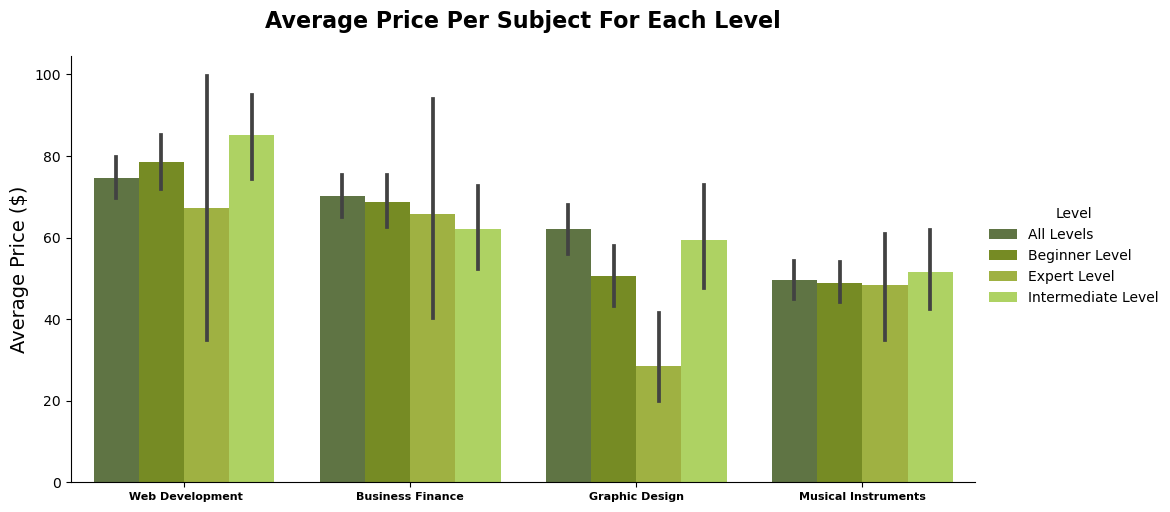

In [41]:
custom_palette =["#607C3C",  "#809C13", "#ABC32F", "#B5E550"]
sns.set_palette(custom_palette)
sns.catplot(data=pivot_data,x='Subject',y='Price',hue='Level', kind='bar',aspect=2)
plt.xticks(fontsize=8, fontweight='bold')
plt.xlabel(None)
plt.ylabel('Average Price ($)', fontsize=14)
plt.title('Average Price Per Subject For Each Level',  fontsize=16, fontweight='bold',pad=20)
plt.savefig('avg_price_per_subjectlevel_column_chart.png')
plt.show()

In [42]:
#Average rating per subject for each level
avg_rat_subjlvl=round((pd.pivot_table(data=pivot_data, index='Subject', columns='Level',values='Rating',aggfunc='mean')),2)
avg_rat_subjlvl

Level,All Levels,Beginner Level,Expert Level,Intermediate Level
Subject,,,,
Web Development,0.65,0.64,0.50,0.67
Business Finance,0.69,0.69,0.70,0.70
Graphic Design,0.73,0.73,0.88,0.72
Musical Instruments,0.31,0.31,0.30,0.28


C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


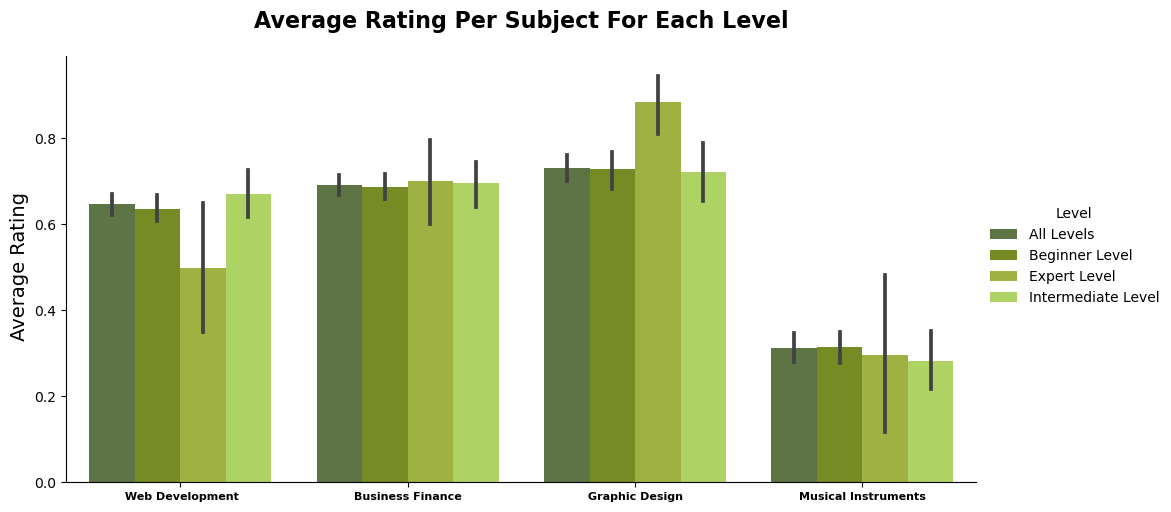

In [43]:
custom_palette =["#607C3C",  "#809C13", "#ABC32F", "#B5E550"]
sns.set_palette(custom_palette)
sns.catplot(data=pivot_data,x='Subject',y='Rating',hue='Level', kind='bar',aspect=2)
plt.xticks(fontsize=8, fontweight='bold')
plt.xlabel(None)
plt.ylabel(' Average Rating', fontsize=14)
plt.title('Average Rating Per Subject For Each Level',  fontsize=16, fontweight='bold',pad=20)
plt.savefig('avg_rating_per_subjectlevel_column_chart.png')
plt.show()

In [44]:
#Creating Pivot Table of the data
yoy_subj_revenue=(pd.pivot_table(data=pivot_data, index='Published_Year',values='Revenue',aggfunc="sum"))

yoy_subj_revenue

,Revenue
Published_Year,
2011,11643420.0
2012,11773470.0
2013,69405820.0
2014,107162385.0
2015,314510395.0
2016,277694340.0
2017,92970175.0


C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


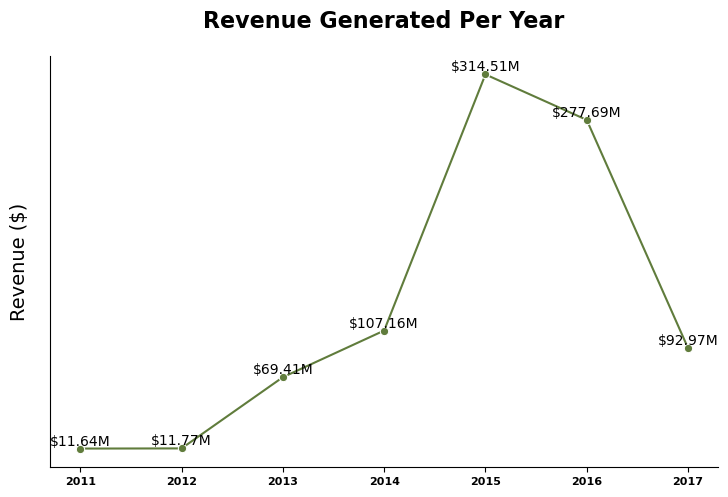

In [45]:
sns.relplot(data=yoy_subj_revenue, kind="line",markers=True,legend=False,aspect=1.5)
for i, value in enumerate(yoy_subj_revenue['Revenue']):
    plt.text(yoy_subj_revenue.index[i], value, f"${value/1000000:.2f}M", ha='center', va='bottom')

plt.xticks(fontsize=8, fontweight='bold')
plt.yticks(([]))
plt.xlabel(None)
plt.ylabel('Revenue ($)', fontsize=14,labelpad=15)
plt.title('Revenue Generated Per Year',  fontsize=16, fontweight='bold',pad=20)
plt.savefig('yoy_revenue_line_graph.png')
plt.show()